## RasterView Op

In [1]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@4248b215

This `Op` wraps the `Views.raster()` method of ImgLib2, converting a [`RealRandomAccessible`](http://javadoc.scijava.org/ImgLib2/net/imglib2/RealRandomAccessible.html) into a [`RandomAccessible`](http://javadoc.scijava.org/ImgLib2/net/imglib2/RandomAccessible.html). In other words, this `Op` converts an image in real space (i.e. data values at non-integer locations) into an image in integer space.

In [2]:
ij.op().help('rasterView')

Available operations:
	(RandomAccessibleOnRealRandomAccessible out) =
	net.imagej.ops.transform.rasterView.DefaultRasterView(
		RealRandomAccessible in)

Lots of times the `RealRandomAccessible` will come from [`interpolateView`](interpolateView.ipynb). Note that we cannot (yet) display the `RealRandomAccessible` in the notebooks, so for now we will display the input:

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


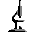

In [5]:
import net.imglib2.interpolation.randomaccess.NearestNeighborInterpolatorFactory
import net.imglib2.interpolation.randomaccess.NLinearInterpolatorFactory
import net.imglib2.interpolation.randomaccess.LanczosInterpolatorFactory

input = ij.scifio().datasetIO().open("http://imagej.net/images/ij-icon.gif")

interpolated= ij.op().run("interpolateView", input, new NLinearInterpolatorFactory())

ij.notebook().display(input)

Note that we can however interrogate decimal coordinates:

In [6]:
access = interpolated.realRandomAccess()

//coordinates to interrogate
x = 16.6 as double
y = 10.2 as double

//set the randomAccess to x in the first dimension and y in the second
access.setPosition(x, 0)
access.setPosition(y, 1)

println(access.get().getRealDouble())

168.0


null

Let's return to a `RandomAccessibleInterval` using `rasterView` and `intervalView`. Note that we have to use `intervalView` as well because `ij.notebook().display()` needs to have an `Interval` to display (i.e. it cannot display an unbounded image), and `rasterView` only returns an image extending `RandomAccessible` (i.e. an unbounded image):

In [11]:
rastered = ij.op().run("rasterView", interpolated)

intervaled = ij.op().run("intervalView", rastered, input)

ij.notebook().display(intervaled)

java.lang.ArrayIndexOutOfBoundsException:  1024